In [3]:
import pandas as pd

datos = pd.read_csv("train.csv")

datosOHE = pd.DataFrame()



In [4]:
datos.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


Vamos a realizar el analisis y el One Hot Encodign de las columnas

In [5]:
# Eliminamos la columna 'ESTU_PRIVADO_LIBERTAD' dado que como todos los
# valores son negativos no tiene efecto en las predicciones

#Dado que se comprobo la igualdad de los datos de las columnas "FAMI_TIENEINTERNET.1" y "FAMI_TIENEINTERNET"
#Pues tambien la eliminamos
datos = datos.drop("FAMI_TIENEINTERNET.1", axis=1)
datos = datos.drop('ESTU_PRIVADO_LIBERTAD', axis=1)


Iniciamos la construccion de un nuevo dataset en el cual tenemos hacemos el One Hot Encode

In [6]:
# Realizamos OneHotEncoding en la columna RENDIMIENTO_GLOBAL conservando el prefijo
#rend = pd.get_dummies(datos['RENDIMIENTO_GLOBAL'], prefix='RENDIMIENTO_GLOBAL')
# Convertir los valores booleanos codificados en 0s y 1s
#rend = rend.astype(int)
#rend.head()
datosOHE = pd.concat([datosOHE, datos['RENDIMIENTO_GLOBAL']], axis=1)
datosOHE.head()
#Falta concatenar

,RENDIMIENTO_GLOBAL
0,medio-alto
1,bajo
2,bajo
3,alto
4,medio-bajo


En la siguiente celda, tratamos la columna "FAMI_EDUCACIONMADRE" dado que faltan datos, como estamos aplicando directamente el One Hot Encode estamos llenando los valores faltantes con 0

In [7]:
# Realizamos OneHotEncoding en la columna FAMI_EDUCACIONMADRE conservando el prefijo

eduMadre = pd.get_dummies(datos['FAMI_EDUCACIONMADRE'], prefix='FAMI_EDUCACIONMADRE')

# Convertir los valores booleanos codificados en 0s y 1s
eduMadre = eduMadre.astype(int)

eduMadre.head()

datosOHE = pd.concat([datosOHE, eduMadre], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,medio-alto,0,0,0,0,0,1,0,0,0,0,0,0
1,bajo,0,0,0,0,0,0,0,0,0,0,0,1
2,bajo,0,0,0,0,0,0,0,0,1,0,0,0
3,alto,0,0,0,0,0,0,0,0,1,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
datosOHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   RENDIMIENTO_GLOBAL                                        692500 non-null  object
 1   FAMI_EDUCACIONMADRE_Educación profesional completa        692500 non-null  int64 
 2   FAMI_EDUCACIONMADRE_Educación profesional incompleta      692500 non-null  int64 
 3   FAMI_EDUCACIONMADRE_Ninguno                               692500 non-null  int64 
 4   FAMI_EDUCACIONMADRE_No Aplica                             692500 non-null  int64 
 5   FAMI_EDUCACIONMADRE_No sabe                               692500 non-null  int64 
 6   FAMI_EDUCACIONMADRE_Postgrado                             692500 non-null  int64 
 7   FAMI_EDUCACIONMADRE_Primaria completa                     692500 non-null  int64 
 8   FAMI_EDUCACION

In [9]:
datos["FAMI_TIENECOMPUTADOR"].value_counts()
#print(datos["FAMI_TIENECOMPUTADOR"])

FAMI_TIENECOMPUTADOR
Si    597670
No     56727
Name: count, dtype: int64

Aplicamos el mismo tratamiento a los datos faltantes

In [10]:
# Realizamos OneHotEncoding en la columna FAMI_TIENECOMPUTADOR conservando el prefijo

computador = pd.get_dummies(datos['FAMI_TIENECOMPUTADOR'], prefix='FAMI_TIENECOMPUTADOR')

# Convertir los valores booleanos codificados en 0s y 1s
computador = computador.astype(int)

computador.head()

datosOHE = pd.concat([datosOHE, computador], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si
0,medio-alto,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,bajo,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,bajo,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,alto,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,medio-bajo,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [11]:
# ESTU_PAGOMATRICULAPROPIO
datos["ESTU_PAGOMATRICULAPROPIO"].value_counts()
#print(datos["ESTU_PAGOMATRICULAPROPIO"])

ESTU_PAGOMATRICULAPROPIO
No    382201
Si    303801
Name: count, dtype: int64

Aplicamos el mismo tratamiento a los datos faltantes

In [12]:
# Realizamos OneHotEncoding en la columna FAMI_TIENECOMPUTADOR conservando el prefijo

pagoMatricula = pd.get_dummies(datos['ESTU_PAGOMATRICULAPROPIO'], prefix='ESTU_PAGOMATRICULAPROPIO')

# Convertir los valores booleanos codificados en 0s y 1s
pagoMatricula = pagoMatricula.astype(int)

pagoMatricula.head()

datosOHE = pd.concat([datosOHE, pagoMatricula], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si
0,medio-alto,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,bajo,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,bajo,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,alto,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [13]:
# FAMI_TIENEAUTOMOVIL
datos["FAMI_TIENEAUTOMOVIL"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

FAMI_TIENEAUTOMOVIL
No    412606
Si    236271
Name: count, dtype: int64

Aplicamos el mismo tratamiento a los datos faltantes

In [14]:
# Realizamos OneHotEncoding en la columna FAMI_TIENECOMPUTADOR conservando el prefijo

automovil = pd.get_dummies(datos['FAMI_TIENEAUTOMOVIL'], prefix='FAMI_TIENEAUTOMOVIL')

# Convertir los valores booleanos codificados en 0s y 1s
automovil = automovil.astype(int)

automovil.head()

datosOHE = pd.concat([datosOHE, automovil], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si
0,medio-alto,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
1,bajo,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,bajo,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
3,alto,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1


Aplicamos el mismo tratamiento a los datos faltantes

In [15]:
datos["FAMI_TIENELAVADORA"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

FAMI_TIENELAVADORA
Si    563390
No     89337
Name: count, dtype: int64

In [16]:
# Realizamos OneHotEncoding en la columna FAMI_TIENELAVADORA conservando el prefijo

lavadora = pd.get_dummies(datos['FAMI_TIENELAVADORA'], prefix='FAMI_TIENELAVADORA')

# Convertir los valores booleanos codificados en 0s y 1s
lavadora = lavadora.astype(int)

lavadora.head()

datosOHE = pd.concat([datosOHE, lavadora], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si
0,medio-alto,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
1,bajo,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
2,bajo,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
3,alto,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1


Aplicamos el mismo tratamiento a los datos faltantes

In [17]:
datos["FAMI_EDUCACIONPADRE"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64

In [18]:
# Realizamos OneHotEncoding en la columna FAMI_EDUCACIONPADRE conservando el prefijo

padre = pd.get_dummies(datos['FAMI_EDUCACIONPADRE'], prefix='FAMI_EDUCACIONPADRE')

# Convertir los valores booleanos codificados en 0s y 1s
padre = padre.astype(int)

padre.head()

datosOHE = pd.concat([datosOHE, padre], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta
0,medio-alto,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,bajo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,bajo,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,alto,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
datos["FAMI_TIENEINTERNET"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

FAMI_TIENEINTERNET
Si    592514
No     73357
Name: count, dtype: int64

In [20]:
# Realizamos OneHotEncoding en la columna FAMI_TIENEINTERNET conservando el prefijo

internet = pd.get_dummies(datos['FAMI_TIENEINTERNET'], prefix='FAMI_TIENEINTERNET')

# Convertir los valores booleanos codificados en 0s y 1s
internet = internet.astype(int)

internet.head()

datosOHE = pd.concat([datosOHE, internet], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,medio-alto,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,bajo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,bajo,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,alto,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
datos["FAMI_ESTRATOVIVIENDA"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64

In [22]:
# Realizamos OneHotEncoding en la columna FAMI_TIENEINTERNET conservando el prefijo

estrato = pd.get_dummies(datos['FAMI_ESTRATOVIVIENDA'], prefix='FAMI_ESTRATOVIVIENDA')

# Convertir los valores booleanos codificados en 0s y 1s
estrato = estrato.astype(int)

estrato.head()

datosOHE = pd.concat([datosOHE, estrato], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,medio-alto,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,bajo,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,bajo,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,alto,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


Vamos evaluar si las dos columnas anteriores contienen los mismod datos

In [23]:
datos["ESTU_HORASSEMANATRABAJA"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64

In [24]:
# Realizamos OneHotEncoding en la columna FAMI_TIENEINTERNET conservando el prefijo

horas = pd.get_dummies(datos['ESTU_HORASSEMANATRABAJA'], prefix='ESTU_HORASSEMANATRABAJA')

# Convertir los valores booleanos codificados en 0s y 1s
horas = horas.astype(int)

horas.head()

datosOHE = pd.concat([datosOHE, horas], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas,ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas
0,medio-alto,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,bajo,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,bajo,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,alto,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [25]:
datos["ESTU_VALORMATRICULAUNIVERSIDAD"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
Name: count, dtype: int64

In [26]:
# Realizamos OneHotEncoding en la columna ESTU_VALORMATRICULAUNIVERSIDAD conservando el prefijo

vMatricula = pd.get_dummies(datos['ESTU_VALORMATRICULAUNIVERSIDAD'], prefix='ESTU_VALORMATRICULAUNIVERSIDAD')

# Convertir los valores booleanos codificados en 0s y 1s
vMatricula = vMatricula.astype(int)

vMatricula.head()

datosOHE = pd.concat([datosOHE, vMatricula], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,ESTU_HORASSEMANATRABAJA_Más de 30 horas,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula
0,medio-alto,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,bajo,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,bajo,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,alto,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
datos["ESTU_PRGM_DEPARTAMENTO"].value_counts()
#print(datos["FAMI_TIENEINTERNET"])

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

In [28]:
# Realizamos OneHotEncoding en la columna ESTU_PRGM_DEPARTAMENTO conservando el prefijo

vMatricula = pd.get_dummies(datos['ESTU_PRGM_DEPARTAMENTO'], prefix='ESTU_PRGM_DEPARTAMENTO')

# Convertir los valores booleanos codificados en 0s y 1s
vMatricula = vMatricula.astype(int)

vMatricula.head()

datosOHE = pd.concat([datosOHE, vMatricula], axis=1)

datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,medio-alto,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bajo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bajo,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,alto,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
datos["ESTU_PRGM_ACADEMICO"].value_counts()
#print(datos["ESTU_PRGM_ACADEMICO"])

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64

Tratamiento de columna ESTU_PRGM_ACADEMICO

In [30]:
# Crear un diccionario de mapeo
mapeo1 = {
    "CONTADURÍA PÚBLICA": "CONTADURIA PUBLICA",  # Agregar todas las variaciones y su forma estándar
    "Contaduría Publica": "CONTADURIA PUBLICA",
    "CONTADURIA PÚBLICA": "CONTADURIA PUBLICA",
    "PROFESIONAL EN CONTADURIA PUBLICA": "CONTADURIA PUBLICA",
    "CONTADURÍA PUBLICA": "CONTADURIA PUBLICA",
    "CONTADURIA PUBLICA ENFASIS EN SISTEMAS Y ECONOMIA SOLIDARIA": "CONTADURIA PUBLICA",
    "CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES": "CONTADURIA PUBLICA",
    "CONTADURIA P¿BLICA": "CONTADURIA PUBLICA",
    "CONTADURÍA PÚBLICA.": "CONTADURIA PUBLICA",
    "CONTADURIA": "CONTADURIA PUBLICA",

    # Agregar más variaciones según sea necesario
}

# Aplicar el mapeo a la columna "ESTU_PRGM_ACADEMICO"
datos["ESTU_PRGM_ACADEMICO"] = datos["ESTU_PRGM_ACADEMICO"].replace(mapeo1)

mapeo1 = {
    "DERECHO Y CIENCIAS SOCIALES": "DERECHO",  # Agregar todas las variaciones y su forma estándar
    "DERECHO Y CIENCIAS POLITICAS": "DERECHO",
    "DERECHO Y CIENCIAS POLÍTICAS": "DERECHO",

    ##
    "ADMINISTRACIÓN DE EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION Y DIRECCION DE EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "PROFESIONAL EN ADMINISTRACIÓN DE EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE EMPRESAS COMERCIALES": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE EMPRESAS Y FINANZAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACI¿N DE EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACIÓN DE EMPRESAS - CICLO PROFESIONAL": "ADMINISTRACION DE EMPRESAS",
    "ADMINSITRACIÓN DE EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION EMPRESAS AGROINDUSTRIALE": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES": "ADMINISTRACION DE EMPRESAS",

    ##
    "PSICOLOGÍA": "PSICOLOGIA",
    "PROFESIONAL EN PSICOLOGÍA": "PSICOLOGIA",
    "PSICÓLOGA": "PSICOLOGIA",
    "LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA": "PSICOLOGIA",
    ###
    "INGENIERIA INDUSTRIAL": "INGENIERIA",
    "INGENIERÍA INDUSTRIAL": "INGENIERIA",
    "INGENIERIA CIVIL": "INGENIERIA",
    "INGENIERIA DE SISTEMAS": "INGENIERIA",
    "INGENIERIA AMBIENTAL": "INGENIERIA",
    "INGENIERIA MECANICA": "INGENIERIA",
    "INGENIERIA ELECTRONICA": "INGENIERIA",
    "INGENIERÍA INDUSTRIAL": "INGENIERIA",
    "INGENIERIA QUIMICA": "INGENIERIA",
    "INGENIERÍA AMBIENTAL": "INGENIERIA",
    "INGENIERIA ELECTRICA": "INGENIERIA",
    "INGENIERIA MECATRONICA": "INGENIERIA",
    "INGENIERIA AGRONOMICA": "INGENIERIA",
    "INGENIERIA BIOMEDICA": "INGENIERIA",
    "INGENIERIA DE ALIMENTOS": "INGENIERIA",
    "INGENIERÍA CIVIL": "INGENIERIA",
    "INGENIERIA AMBIENTAL Y SANITARIA": "INGENIERIA",
    "INGENIERIA DE TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERIA DE SISTEMAS Y COMPUTACION": "INGENIERIA",
    "INGENIERIA AGROINDUSTRIAL": "INGENIERIA",
    "INGENIERIA ELECTROMECANICA": "INGENIERIA",
    "INGENIERIA INFORMATICA": "INGENIERIA",
    "INGENIERIA DE PETROLEOS": "INGENIERIA",
    "INGENIERIA DE PRODUCCION": "INGENIERIA",
    "INGENIERIA FINANCIERA": "INGENIERIA",
    "INGENIERÍA DE SISTEMAS": "INGENIERIA",
    "INGENIERÍA DE SOFTWARE": "INGENIERIA",
    "INGENIERIA DE SOFTWARE": "INGENIERIA",
    "INGENIERIA AGRICOLA": "INGENIERIA",
    "INGENIERIA FORESTAL": "INGENIERIA",
    "INGENIERIA EN TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERIA ADMINISTRATIVA": "INGENIERIA",
    "INGENIERIA AERONAUTICA": "INGENIERIA",
    "INGENIERIA DE MINAS": "INGENIERIA",
    "INGENIERÍA MECATRÓNICA": "INGENIERIA",
    "INGENIERIA DE PRODUCTIVIDAD Y CALIDAD": "INGENIERIA",
    "INGENIERÍA ELECTROMECÁNICA": "INGENIERIA",
    "INGENIERIA ELECTRONICA Y TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERÍA ELECTRÓNICA": "INGENIERIA",
    "INGENIERIA FISICA": "INGENIERIA",
    "INGENIERIA AGROPECUARIA": "INGENIERIA",
    "INGENIERIA  CIVIL": "INGENIERIA",
    "INGENIERIA METALURGICA": "INGENIERIA",
    "INGENIERIA GEOLOGICA": "INGENIERIA",
    "INGENIERIA FINANCIERA Y DE NEGOCIOS": "INGENIERIA",
    "INGENIERIA EN MECATRONICA": "INGENIERIA",
    "INGENIERIA CATASTRAL Y GEODESIA": "INGENIERIA",
    "INGENIERÍA MECÁNICA": "INGENIERIA",
    "INGENIERIA AGROECOLOGICA": "INGENIERIA",
    "INGENIERÍA INFORMÁTICA": "INGENIERIA",
    "INGENIERIA TOPOGRAFICA": "INGENIERIA",
    "INGENIERÍA ELÉCTRICA": "INGENIERIA",
    "INGENIERIA DE PROCESOS": "INGENIERIA",
    "INGENIERIA DE SISTEMAS Y TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERIA DE DISEÑO DE PRODUCTO": "INGENIERIA",
    "INGENIERIA AMBIENTAL Y DE SANEAMIENTO": "INGENIERIA",
    "INGENIERÍA AGROINDUSTRIAL": "INGENIERIA",
    "INGENIERIA AGROFORESTAL": "INGENIERIA",
    "INGENIERIA MULTIMEDIA": "INGENIERIA",
    "INGENIERIA DE SISTEMAS E INFORMATICA": "INGENIERIA",
    "BIOINGENIERIA": "INGENIERIA",
    "INGENIERIA DE SONIDO": "INGENIERIA",
    "INGENIERIA SANITARIA Y AMBIENTAL": "INGENIERIA",
    "INGENIERIA EN TELEMATICA": "INGENIERIA",
    "INGENIERIA EN MULTIMEDIA": "INGENIERIA",
    "INGENIERIA COMERCIAL": "INGENIERIA",
    "INGENIERÍA AGRONÓMICA": "INGENIERIA",
    "INGENIERÍA MECATRÓNICA - CICLO PROFESIONAL UNIVERSITARIO": "INGENIERIA",
    "INGENIERÍA DE SISTEMAS Y COMPUTACIÓN": "INGENIERIA",
    "INGENIERÍA QUÍMICA": "INGENIERIA",
    "INGENIERÍA DE TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERÍA SANITARIA": "INGENIERIA",
    "INGENIERIA DE TRANSPORTE Y VIAS": "INGENIERIA",
    "CONSTRUCCION EN ARQUITECTURA E INGENIERIA": "INGENIERIA",
    "INGENIERIA DE MATERIALES": "INGENIERIA",
    "INGENIERÍA DE PRODUCCIÓN": "INGENIERIA",
    "INGENIERÍA BIOQUÍMICA": "INGENIERIA",
    "BIOINGENIERÍA": "INGENIERIA",
    "INGENIERIA BIOTECNOLOGICA": "INGENIERIA",
    "INGENIERIA SANITARIA": "INGENIERIA",
    "INGENIERÍA EN DISEÑO DE ENTRETENIMIENTO DIGITAL": "INGENIERIA",
    "INGENIERÍA GEOLÓGICA": "INGENIERIA",
    "INGENIERIA EN HIGIENE Y SEGURIDAD INDUSTRIAL": "INGENIERIA",
    "INGENIERIA  AMBIENTAL": "INGENIERIA",
    "INGENIERIA GEOGRAFICA Y AMBIENTAL": "INGENIERIA",
    "INGENIERÍA EN DISEÑO INDUSTRIAL": "INGENIERIA",
    "INGENIERIA DE PROCESOS INDUSTRIALES": "INGENIERIA",
    "INGENIERIA AGRONÓMICA": "INGENIERIA",
    "INGENIERIA DE MINAS Y METALURGIA": "INGENIERIA",
    "INGENIERIA EN  TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERIA DE MERCADOS": "INGENIERIA",
    "INGENIERIA EN CONTROL": "INGENIERIA",
    "INGENIERIA BIOLOGICA": "INGENIERIA",
    "INGENIERIA EN ENERGIA": "INGENIERIA",
    "INGENIERÍA GEOGRÁFICA Y AMBIENTAL": "INGENIERIA",
    "INGENIERIA DE SISTEMAS Y  COMPUTACION": "INGENIERIA",
    "INGENIERIA EN AUTOMATIZACIÓN": "INGENIERIA",
    "INGENIERIA PESQUERA": "INGENIERIA",
    "INGENIERIA EN AUTOMATICA INDUSTRIAL": "INGENIERIA",
    "INGENIERÌA INFORMÀTICA": "INGENIERIA",
    "INGENIER¿A EN SOFTWARE": "INGENIERIA",
    "INGENIERÍA AGROPECUARIA": "INGENIERIA",
    "INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES": "INGENIERIA",
    "INGENIERIA EN INSTRUMENTACION Y CONTROL": "INGENIERIA",
    "INGENIERÍA DE PETRÓLEO Y GAS": "INGENIERIA",
    "INGENIERIA DE CONTROL": "INGENIERIA",
    "INGENIERIA EN INFORMATICA": "INGENIERIA",
    "INGENIERÍA AMBIENTAL Y SANITARIA": "INGENIERIA",
    "INGENIERÍA MULTIMEDIA": "INGENIERIA",
    "INGENIERÍA FORESTAL": "INGENIERIA",
    "INGENIERIA EN PRODUCCION ACUICOLA": "INGENIERIA",
    "INGENIERIA DE TELECOMUNICACIONES E INFORMATICA": "INGENIERIA",
    "INGENIERIA EN SOFTWARE": "INGENIERIA",
    "INGENIERÍA AERONÁUTICA": "INGENIERIA",
    "INGENIERÍA DE LAS ARTES DIGITALES": "INGENIERIA",
    "INGENIERÍA EN PROCESOS INDUSTRIALES": "INGENIERIA",
    "INGENIERÍA DE ALIMENTOS": "INGENIERIA",
    "INGENIERIA EN NANOTECNOLOGIA": "INGENIERIA",
    "INGENIERÍA EN ENERGÍAS": "INGENIERIA",
    "INGENIERIA DE SISTEMAS DE INFORMACION": "INGENIERIA",
    "INGENIERIA  AGROFORESTAL": "INGENIERIA",
    "INGENIERÍA EN TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES": "INGENIERIA",
    "INGENIERIA NAVAL": "INGENIERIA",
    "INGENIERÍA AGRONOMICA": "INGENIERIA",
    "INGENIERIA EN CONTROL Y AUTOMATIZACION INDUSTRIAL": "INGENIERIA",
    "INGENIERIA DE SISTEMAS INFORMÁTICOS": "INGENIERIA",
    "INGENIERÍA OCEANOGRÁFICA": "INGENIERIA",
    "INGENIERIA DE LA CALIDAD": "INGENIERIA",
    "INGENIERIA DE SOFTWARE Y COMUNICACIONES": "INGENIERIA",
    "INGENIERIA DE PLASTICOS": "INGENIERIA",
    "INGENIERIA MECATRÓNICA": "INGENIERIA",
    "INGENIERIA EN ENERGIAS": "INGENIERIA",
    "INGENIERIA ELÉCTRICA": "INGENIERIA",
    "INGENIERÍA PETROQUÍMICA": "INGENIERIA",
    "INGENIERÍA URBANA": "INGENIERIA",
    "INGENIERIA EN CONTROL Y AUTOMATIZACIÓN": "INGENIERIA",
    "INGENIERIA TEXTIL": "INGENIERIA",
    ##
    "PROFESIONAL EN TRABAJO SOCIAL": "TRABAJO SOCIAL",
    ##
    "ENFERMERÍA": "ENFERMERIA",
    ##
    "CONSTRUCCION Y GESTION EN ARQUITECTURA": "ARQUITECTURA",
    "ADMINISTRACIÓN DE OBRAS DE ARQUITECTURA": "ARQUITECTURA",
    ##
    "ADMINISTRACIÓN EN SALUD OCUPACIONAL": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "SALUD OCUPACIONAL": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "SEGURIDAD Y SALUD EN EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "ADMINISTRACIÓN INTEGRAL DE RIESGOS DE SEGURIDAD Y SALUD EN EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "INGENIERIA EN SEGURIDAD Y SALUD PARA EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "ADMINISTRACIÓN EN SEGURIDAD Y SALUD EN EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "ADMINISTRACIÓN DE LA SEGURIDAD Y SALUD   EN EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "ADMINISTRACIÓN DE LA SALUD OCUPACIONAL": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "INGENIERÍA EN SEGURIDAD Y SALUD PARA EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "PROFESIONAL SEGURIDAD Y SALUD EN EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    "INGENIERÍA EN SEGURIDAD Y SALUD EN EL TRABAJO": "SEGURIDAD Y SALUD EN EL TRABAJO",
    ##
    "ADMINISTRACION DE NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACION DE NEGOCIOS": "NEGOCIOS INTERNACIONALES",
    "FINANZAS Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "MARKETING Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "MERCADEO Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "NEGOCIOS Y RELACIONES INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "NEGOCIOS Y FINANZAS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ECONOMIA Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "NEGOCIOS INTERNACIONALES SEGUNDO CICLO": "NEGOCIOS INTERNACIONALES",
    "PROFESIONAL EN MARKETING Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "PROFESIONAL EN NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "PROFESIONAL EN FINANZAS Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "COMERCIO Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACION Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "PROFESIONAL EN AGRONEGOCIOS": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACIÓN Y NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACIÒN DE NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "ADMINISTRACION EN NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    ##
    'LICENCIATURA EN PEDAGOGIA INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA EN PEDAGOGÍA INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA EN EDUCACION INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA EN EDUCACIÓN INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA  PEDAGOGIA INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA EN PEDAGOGIA  INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA EN PEDAGOG¿A INFANTIL': 'PEDAGOGIA INFANTIL',
    'LICENCIATURA EN EDUCACI¿N INFANTIL': 'PEDAGOGIA INFANTIL',
    ##
    'ECONOMÍA': 'ECONOMIA',
    'RELACIONES ECONOMICAS INTERNACIONALES': 'ECONOMIA',
    'ECONOMIA Y FINANZAS INTERNACIONALES': 'ECONOMIA',
    'ECONOM¿A': 'ECONOMIA',
    ##
    'TERAPIA RESPIRATORIA': 'FISIOTERAPIA',
    'TERAPIA CARDIORRESPIRATORIA': 'FISIOTERAPIA',
    ##
    'COMUNICACION SOCIAL- PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL Y PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACIÓN SOCIAL': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL - PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIALY PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL-PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL -  PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL  - PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACION Y PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACIÓN SOCIAL Y MEDIOS DIGITALES': 'COMUNICACION SOCIAL',
    'COMUNICACIÓN SOCIAL - PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACI¿N SOCIAL': 'COMUNICACION SOCIAL',
    'COMUNICACION SOCIAL     Y     PERIODISMO': 'COMUNICACION SOCIAL',
    'PROFESIONAL EN COMUNICACION SOCIAL - PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACI¿N SOCIAL Y PERIODISMO': 'COMUNICACION SOCIAL',
    'COMUNICACIÓN SOCIAL Y PERIODISMO': 'COMUNICACION SOCIAL',
    ##
    'ODONTOLOGÍA': 'ODONTOLOGIA',
    ##
    'ADMINISTRACION PUBLICA TERRITORIAL': 'ADMINISTRACION PUBLICA',
    'ADMINISTRACIÓN PÚBLICA': 'ADMINISTRACION PUBLICA',
    'ADMINISTRACI¿N P¿BLICA': 'ADMINISTRACION PUBLICA',
    ##
    'ADMINISTRACIÓN FINANCIERA': 'FINANZAS',
    'ADMINISTRACION FINANCIERA': 'FINANZAS',
    'FINANZAS Y COMERCIO INTERNACIONAL': 'FINANZAS',
    'FINANZAS Y COMERCIO EXTERIOR': 'FINANZAS',
    'FINANZAS Y RELACIONES INTERNACIONALES': 'FINANZAS',
    'ADMINISTRACION Y FINANZAS': 'FINANZAS',
    'ADMINISTRACIÓN COMERCIAL Y FINANCIERA': 'FINANZAS',
    'ADMINISTRACION BANCARIA Y FINANCIERA': 'FINANZAS',
    'ADMINISTRACION  FINANCIERA': 'FINANZAS',
    'ADMINISTRACION FINANCIERA Y DE SISTEMAS': 'FINANZAS',
    'PROFESIONAL EN BANCA Y FINANZAS': 'FINANZAS',
    'BANCA Y FINANZAS': 'FINANZAS',
    'COMERCIO Y FINANZAS INTERNACIONALES': 'FINANZAS',
    'BANCA Y FINANZAS INTERNACIONALES': 'FINANZAS',
    ##
    'ADMINISTRACION EN SALUD': 'SALUD',
    'ADMINISTRACION DE SERVICIOS DE SALUD': 'SALUD',
    'ADMINISTRACIÓN DE SERVICIOS DE SALUD': 'SALUD',
    'ADMINISTRACIÓN EN SALUD': 'SALUD',
    'ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y  ENFASIS EN GESTION SANITARIA Y AMBIENTAL': 'SALUD',
    'GERENCIA EN SISTEMAS DE INFORMACION EN SALUD': 'SALUD',
    'ADMINISTRACIÓN EN SERVICIOS DE SALUD': 'SALUD',
    ##
    'ADMINISTRACION TURISTICA Y HOTELERA': 'ADMINISTRACION',
    'ADMINISTRACION DE MERCADEO': 'ADMINISTRACION',
    'ADMINISTRACION DE EMPRESAS AGROPECUARIAS': 'ADMINISTRACION',
    'ADMINISTRACION POLICIAL': 'ADMINISTRACION',
    'ADMINISTRACION AMBIENTAL': 'ADMINISTRACION',
    'ADMINISTRACIÓN TECNÓLOGICA': 'ADMINISTRACION',
    'ADMINISTRACION INDUSTRIAL': 'ADMINISTRACION',
    'ADMINISTRACION COMERCIAL Y DE MERCADEO': 'ADMINISTRACION',
    'ADMINISTRACIÓN LOGÍSTICA': 'ADMINISTRACION',
    'ADMINISTRACION HUMANA': 'ADMINISTRACION',
    'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES': 'ADMINISTRACION',
    'ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES': 'ADMINISTRACION',
    'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS': 'ADMINISTRACION',
    'ADMINISTRACION DE EMPRESAS TURISTICAS': 'ADMINISTRACION',
    'ADMINISTRACION DEL MEDIO AMBIENTE': 'ADMINISTRACION',
    'ADMINISTRACION MARITIMA Y FLUVIAL': 'ADMINISTRACION',
    'ADMINISTRACION LOGISTICA': 'ADMINISTRACION',
    'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS': 'ADMINISTRACION',
    'ADMINISTRACION DE SISTEMAS INFORMATICOS': 'ADMINISTRACION',
    'ADMINISTRACIÓN DE COMERCIO EXTERIOR': 'ADMINISTRACION',
    'ADMINISTRACIÓN COMERCIAL': 'ADMINISTRACION',
    'ADMINISTRACION DEPORTIVA': 'ADMINISTRACION',
    'ADMINISTRACION DE LA SEGURIDAD SOCIAL': 'ADMINISTRACION',
    'ADMINISTRACION AGROPECUARIA': 'ADMINISTRACION',
    'ADMINISTRACI¿N LOG¿STICA': 'ADMINISTRACION',
    'ADMINSITRACION TURISTICA Y HOTELERA': 'ADMINISTRACION',
    'ADMINISTRACION DEL TURISMO SOSTENIBLE': 'ADMINISTRACION',
    'ADMINISTRACION AERONAUTICA': 'ADMINISTRACION',
    'ADMINISTRACIÓN TURÍSTICA': 'ADMINISTRACION',
    'ADMINISTRACION EN LOGISTICA Y PRODUCCION': 'ADMINISTRACION',
    'ADMINISTRACION COMERCIAL': 'ADMINISTRACION',
    'ADMINISTRACION MARITIMA': 'ADMINISTRACION',
    'ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS': 'ADMINISTRACION',
    'ADMINISTRACION DE INSTITUCIONES DE SERVICIO': 'ADMINISTRACION',
    'ADMINISTRACIÓN TURÍSTICA Y HOTELERA': 'ADMINISTRACION',
    'ADMINISTRACION Y GESTION AMBIENTAL': 'ADMINISTRACION',
    'ADMINISTRACIÓN HOTELERA Y DE SERVICIOS': 'ADMINISTRACION',
    'ADMINISTRACION DEL COMERCIO INTERNACIONAL': 'ADMINISTRACION',
    'ADMINISTRACIÓN DE EMPRESAS TURISTICAS': 'ADMINISTRACION',
    'ADMINISTRACION DE SISTEMAS INFORMÁTICOS': 'ADMINISTRACION',
    'ADMINISTRACIÓN LOGISTICA': 'ADMINISTRACION',
    'ADMINISTRACION DE EMPRESAS TURISTICA': 'ADMINISTRACION',
    'ADMINISTRACION MARITIMA Y PORTUARIA': 'ADMINISTRACION',
    'ADMINISTRACIÓN DE AGRONEGOCIOS': 'ADMINISTRACION',
    'ADMINISTRACION & SERVICIO': 'ADMINISTRACION',
    'ADMINISTRACION INFORMÁTICA': 'ADMINISTRACION',
    'ADMINISTRACIÓN MARITIMA Y PORTUARIA': 'ADMINISTRACION',
    'ADMINISTRACIÓN AGROINDUSTRIAL': 'ADMINISTRACION',
    'ADMINISTRACION TURISTICA': 'ADMINISTRACION',
    'ADMINISTRACION DE GESTISN HUMANA': 'ADMINISTRACION',
    'ADMINISTRACIÓN TÚRÍSTICA': 'ADMINISTRACION',
    'ADMINISTRACION DE HOTELERIA Y TURISMO': 'ADMINISTRACION',
    'ADMINISTRACION EMPRESAS AGROINDUSTRIALES': 'ADMINISTRACION',
    'ADMINISTRACION TURÍSTICA': 'ADMINISTRACION',
    'ADMINISTRACION DE SISTEMAS': 'ADMINISTRACION',
    'ADMINISTRACION DE LA CALIDAD': 'ADMINISTRACION',
    'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES': 'ADMINISTRACION',
    'ADMINISTRACION INFORMATICA': 'ADMINISTRACION',
    'ADMINISTRACIÓN DE EMPRESAS TURISTICAS POR CICLOS - CICLO PROFESIONAL': 'ADMINISTRACION',
    'ADMINISTRACION DE COMERCIO EXTERIOR': 'ADMINISTRACION',
    'ADMINISTRACION TECNOLOGICA': 'ADMINISTRACION',
    ##
    'MEDICINA VETERINARIA Y ZOOTECNIA': 'MEDICINA VETERINARIA',
    ##
    'LICENCIATURA EN BIOLOGIA Y QUIMICA': 'BIOLOGIA',
    'MICROBIOLOGIA': 'BIOLOGIA',
    'BIOLOGÍA': 'BIOLOGIA',
    'LICENCIATURA EN BIOLOGIA': 'BIOLOGIA',
    'MICROBIOLOGIA Y BIOANALISIS': 'BIOLOGIA',
    'MICROBIOLOGIA INDUSTRIAL': 'BIOLOGIA',
    'BIOLOGIA MARINA': 'BIOLOGIA',
    'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL': 'BIOLOGIA',
    'MICROBIOLOGIA INDUSTRIAL Y AMBIENTAL': 'BIOLOGIA',
    'BIOLOGIA APLICADA': 'BIOLOGIA',
    'MICROBIOLOGÍA': 'BIOLOGIA',
    'LICENCIATURA EN BIOLOGIA CON ENFASIS EN EDUCACION AMBIENTAL': 'BIOLOGIA',
    'BIOLOGIA AMBIENTAL': 'BIOLOGIA',
    'LICENCIATURA EN CIENCIAS NATURALES: FÍSICA QUÍMICA Y BIOLOGÍA': 'BIOLOGIA',
    'MICROBIOLOGÍA INDUSTRIAL Y AMBIENTAL': 'BIOLOGIA',
    'BIOLOGÍA AMBIENTAL': 'BIOLOGIA',
    'LICENCIATURA EN BIOLOGÍA': 'BIOLOGIA',
    'MICROBIOLOGÍA Y BIOANÁLISIS': 'BIOLOGIA',
    ##
    'LICENCIATURA EN CIENCIAS SOCIALES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION PREESCOLAR': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN ETNOEDUCACION': 'LICENCIATURA',
    'LICENCIATURA EN MATEMATICAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN MATEMATICA HUMANIDADES Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES': 'LICENCIATURA',
    'LICENCIATURA EN MUSICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS MODERNAS': 'LICENCIATURA',
    'LICENCIATURA EN ESPAÑOL Y LITERATURA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN PARA LA PRIMERA INFANCIA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA CASTELLANA E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN INGLÉS COMO LENGUA EXTRANJERA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION ARTISTICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES- LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION ESPECIAL': 'LICENCIATURA',
    'LICENCIATURA EN PREESCOLAR': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN CULTURA, FISICA, RECREACION Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN MATEMATICAS Y FISICA': 'LICENCIATURA',
    'LICENCIATURA EN ETNOEDUCACION CON ENFASIS EN CIENCIAS SOCIALES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN MATEMATICAS': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA CASTELLANA,INGLES Y FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA CASTELLANA Y COMUNICACION': 'LICENCIATURA',
    'LICENCIATURA EN ARTES VISUALES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS INGLES - FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA': 'LICENCIATURA',
    'LICENCIATURA EN IDIOMAS EXTRANJEROS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION PARA LA PRIMERA INFANCIA': 'LICENCIATURA',
    'LICENCIATURA EN LITERATURA Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN QUIMICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INFORMATICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN FISICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES': 'LICENCIATURA',
    'LICENCIATURA EN LINGUISTICA Y LITERATURA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN MATEMÁTICAS': 'LICENCIATURA',
    'LICENCIATURA EN TEOLOGIA': 'LICENCIATURA',
    'LICENCIATURA EN INFORMATICA': 'LICENCIATURA',
    'LICENCIATURA EN BILINGÜISMO CON ÉNFASIS EN INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN COMUNICACION E INFORMATICA EDUCATIVA': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA Y EDUCACION RELIGIOSA': 'LICENCIATURA',
    'LICENCIATURA EN INFORMATICA Y MEDIOS AUDIOVISUALES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS: INGLES-FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN LITERATURA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN ESPECIAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES -  LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA Y LETRAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION CON ENFASIS EN EDUCACION ESPECIAL': 'LICENCIATURA',
    'LICENCIATURA EN INGLES Y FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN TECNOLOGIA E INFORMATICA': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS INGLES-FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES E IDIOMAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION CON ENFASIS EN INGLES': 'LICENCIATURA',
    'LICENCIATURA EN DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN IDIOMAS MODERNOS ESPAÑOL- INGLES': 'LICENCIATURA',
    'LICENCIATURA EN ARTES': 'LICENCIATURA',
    'LICENCIATURA EN PSICOPEDAGOGIA CON ENFASIS EN ASESORIA EDUCATIVA': 'LICENCIATURA',
    'LICENCIATURA EN PEDAGOGIA DE LA PRIMERA INFANCIA': 'LICENCIATURA',
    'LICENCIATURA EN INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA RECREACION Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN INGLÉS-ESPAÑOL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES, ESPAÑOL Y LENGUAS EXTRANJERAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION ARTISTICA Y CULTURAL': 'LICENCIATURA',
    'LICENCIATURA EN HUMANIDADES Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION COMUNITARIA CON ENFASIS EN DERECHOS HUMANOS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN ARTÍSTICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: ESPAÑOL E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES, LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN INGLÉS Y BILINGÜISMO': 'LICENCIATURA',
    'LICENCIATURA EN ARTES ESCENICAS': 'LICENCIATURA',
    'LICENCIATURA EN PEDAGOGÍA SOCIAL PARA LA REHABILITACIÓN': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS SOCIALES CON ÉNFASIS EN EDUCACIÓN BÁSICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN FÍSICA Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA EXTRANJERA INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA, DEPORTES Y RECREACION': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION  FISICA RECREACION  Y  DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN INGLES - ESPAÑOL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BILINGUE CON ENFASIS EN LA ENSEÑANZA DEL INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS RELIGIOSAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN LENGUAS EXTRANJERAS': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS DEL DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACI¿N B¿SICA PRIMARIA': 'LICENCIATURA',
    'LICENCIATURA EN ETNOEDUCACION Y DESARROLLO COMUNITARIO': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION: ARTES PLASTICAS': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS MODERNAS, INGLES Y FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN IDIOMA EXTRANJERO - INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN INFORMATICA EDUCATIVA': 'LICENCIATURA',
    'LICENCIATURA EN ESPAÑOL E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN HISTORIA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION ARTISTICA Y ARTES ESCENICAS': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN ESPAÑOL Y LENGUAS EXTRANJERAS': 'LICENCIATURA',
    'Licenciatura en Lenguas Extranjeras con Énfasis en Inglés': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION INDUSTRIAL': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS MODERNAS INGLES-FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA-MUSICA': 'LICENCIATURA',
    'LICENCIATURA EN ARTES PLASTICAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACI¿N ART¿STICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN  FÍSICA, RECREACIÓN Y DEPORTES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION RELIGIOSA': 'LICENCIATURA',
    'LICENCIATURA EN ARTE Y FOLKLORE Y CULTURA': 'LICENCIATURA',
    'LICENCIATURA EN TEATRO': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN PARA LA CONVIVENCIA Y EL DESARROLLO HUMANO': 'LICENCIATURA',
    'LICENCIATURA EN DISEÑO TECNOLOGICO CON ENFASIS EN SISTEMAS MECANICOS': 'LICENCIATURA',
    'LICENCIATURA EN RECREACION': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS CON ÉNFASIS EN INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN TEOLOGÍA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACI¿N CON ¿NFASIS EN CIENCIAS SOCIALES Y AMBIENTALES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS  EXTRANJERAS': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS NATURALES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN LENGUA CASTELLANA E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN LENGUA INGLESA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN PRODUCCION AGROPECUARIA': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS SOCIALES Y DESARROLLO LOCAL': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN BILINGÜISMO CON ENFASIS EN LA ENSEÑANZA DEL INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA': 'LICENCIATURA',
    'LICENCIATURA EN ARTES ESCENICAS CON ENFASIS EN TEATRO': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA EN DANZA': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA, PENSAMIENTO POLITICO Y ECONOMICO': 'LICENCIATURA',
    'LICENCIATURA EN ARTES ESCÉNICAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN FÍSICA Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA E HISTORIA': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFÍA': 'LICENCIATURA',
    'LICENCIATURA EN ARTE DRAMATICO': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS SOCIALES': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN  FÍSICA, RECREACIÓN Y DEPORTE': 'LICENCIATURA',
    'LICENCIATURA  EN MATEMATICAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION ARTISTICA CON ENFASIS EN DANZA Y TEATRO': 'LICENCIATURA',
    'LICENCIATURA  EN INGLES Y FRANCES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BILINGUE-ESPAÑOL-INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN FÍSICA DEPORTES Y RECREACIÓN': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN  FILOSOFIA Y CIENCIAS RELIGIOSAS': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS CON ¿NFASIS EN INGL¿S': 'LICENCIATURA',
    'LICENCIATURA EN TECNOLOGIA E INFORMATICA': 'LICENCIATURA',
    'LICENCIATURA EN MATEMATICAS Y ESTADISTICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN PREESCOLAR': 'LICENCIATURA',
    'LICENCIATURA EN  CIENCIAS NATURALES Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN ELECTRONICA': 'LICENCIATURA',
    'LICENCIATURA M¿SICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUAS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA, CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA  CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN MATEMATICAS E INFORMATICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BILINGUE': 'LICENCIATURA',
    'LICENCIATURA EN LENGUAS EXTRANJERAS CON ENFASIS EN INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION POPULAR': 'LICENCIATURA',
    'LICENCIATURA EN PEDAGOGÍA DE LA MADRE TIERRA, Frecuencia': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA PRIMARIA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN CIENCIAS NATURALES Y EDUCACIÓN AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN  MATEMATICAS Y FISICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN ARTÍSTICA Y CULTURAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN HUMANIDADES, LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BILINGUE': 'LICENCIATURA',
    'LICENCIATURA EN MUSICA Y DANZA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E IDIOMA EXTRANJERO: INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA LENGUAS EXTRANJERAS CON ENFASIS EN INGLES': 'LICENCIATURA',
    'LICENCIATURA EN BILINGUISMO CON ENFASIS EN ESPAÑOL E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA, ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN HUMANIDADES, LENGUA CASTELLANA E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN ESPAÑOL E INGLÉS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA Y CULTURAL: MÚSICA': 'LICENCIATURA',
    'LICENCIATURA EN ARTES PLASTICAS Y VISUALES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN  HUMANIDADES, LENGUA CASTELLANA E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN  FILOSOFIA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION PREESCOLAR CON ENFASIS EN INGLES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN: ARTES PLÁSTICAS': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA Y HUMANIDADES': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BILINGÜE- ESPAÑOL E INGLES': 'LICENCIATURA',
    'LICENCIATURA EN MATEMATICAS Y TECNOLOGIAS DE LA INFORMACION': 'LICENCIATURA',
    'LICENCIATURA EN MATEMÁTICAS Y FÍSICA': 'LICENCIATURA',
    'LICENCIATURA EN QUIMICA Y EDUCACION AMBIENTAL': 'LICENCIATURA',
    'LICENCIATURA EN MÚSICA': 'LICENCIATURA',
    'LICENCIATURA EN DANZA CLASICA': 'LICENCIATURA',
    'LICENCIATURA EN FILOSOFIA, ETICA Y VALORES HUMANOS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA Y CULTURAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION INICIAL': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION RELIGIOSA CON ENFASIS EN BIBLIA': 'LICENCIATURA',
    'LICENCIATURA EN  LITERATURA Y LENGUA CASTELLANA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION ENFASIS EN INFORMATICA': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA CON ÉNFASIS EN INGLÉS Y EN FRANCÉS': 'LICENCIATURA',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION  FISICA, DEPORTES Y RECREACION': 'LICENCIATURA',



}

datos["ESTU_PRGM_ACADEMICO"] = datos["ESTU_PRGM_ACADEMICO"].replace(mapeo1)

In [31]:
frecuencias = datos["ESTU_PRGM_ACADEMICO"].value_counts()

# Iterar sobre cada índice (valor único) y su frecuencia
for valor, frecuencia in frecuencias.items():
    print(f"Valor: {valor}, Frecuencia: {frecuencia}")

Valor: INGENIERIA, Frecuencia: 146246
Valor: ADMINISTRACION DE EMPRESAS, Frecuencia: 80265
Valor: DERECHO, Frecuencia: 53696
Valor: CONTADURIA PUBLICA, Frecuencia: 53023
Valor: PSICOLOGIA, Frecuencia: 50303
Valor: LICENCIATURA, Frecuencia: 46721
Valor: NEGOCIOS INTERNACIONALES, Frecuencia: 21289
Valor: SEGURIDAD Y SALUD EN EL TRABAJO, Frecuencia: 19480
Valor: PEDAGOGIA INFANTIL, Frecuencia: 18164
Valor: MEDICINA, Frecuencia: 18099
Valor: COMUNICACION SOCIAL, Frecuencia: 14893
Valor: TRABAJO SOCIAL, Frecuencia: 13101
Valor: ENFERMERIA, Frecuencia: 12186
Valor: ARQUITECTURA, Frecuencia: 11739
Valor: ADMINISTRACION, Frecuencia: 9690
Valor: FINANZAS, Frecuencia: 8871
Valor: ECONOMIA, Frecuencia: 7846
Valor: ADMINISTRACION PUBLICA, Frecuencia: 6834
Valor: FISIOTERAPIA, Frecuencia: 6686
Valor: BIOLOGIA, Frecuencia: 5547
Valor: MEDICINA VETERINARIA, Frecuencia: 5409
Valor: ODONTOLOGIA, Frecuencia: 5272
Valor: SALUD, Frecuencia: 3182
Valor: DISEÑO GRAFICO, Frecuencia: 2818
Valor: DISEÑO INDUST

In [32]:
datos["ESTU_PRGM_ACADEMICO"].value_counts()

ESTU_PRGM_ACADEMICO
INGENIERIA                                                146246
ADMINISTRACION DE EMPRESAS                                 80265
DERECHO                                                    53696
CONTADURIA PUBLICA                                         53023
PSICOLOGIA                                                 50303
                                                           ...  
LICENCIATURA EN ARTE Y FOLKLORE                                1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES         1
FORMACION PROFESIONAL EN DEPORTE                               1
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                            1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                          1
Name: count, Length: 400, dtype: int64

ESTU_PRGM_ACADEMICO
INGENIERIA                             146246
ADMINISTRACION DE EMPRESAS              80265
DERECHO                                 53696
CONTADURIA PUBLICA                      53023
PSICOLOGIA                              50303
LICENCIATURA                            46721
NEGOCIOS INTERNACIONALES                21289
SEGURIDAD Y SALUD EN EL TRABAJO         19480
PEDAGOGIA INFANTIL                      18164
MEDICINA                                18099
COMUNICACION SOCIAL                     14893
TRABAJO SOCIAL                          13101
ENFERMERIA                              12186
ARQUITECTURA                            11739
ADMINISTRACION                           9690
FINANZAS                                 8871
ECONOMIA                                 7846
ADMINISTRACION PUBLICA                   6834
FISIOTERAPIA                             6686
BIOLOGIA                                 5547
MEDICINA VETERINARIA                     5409
ODONTOLOGIA   

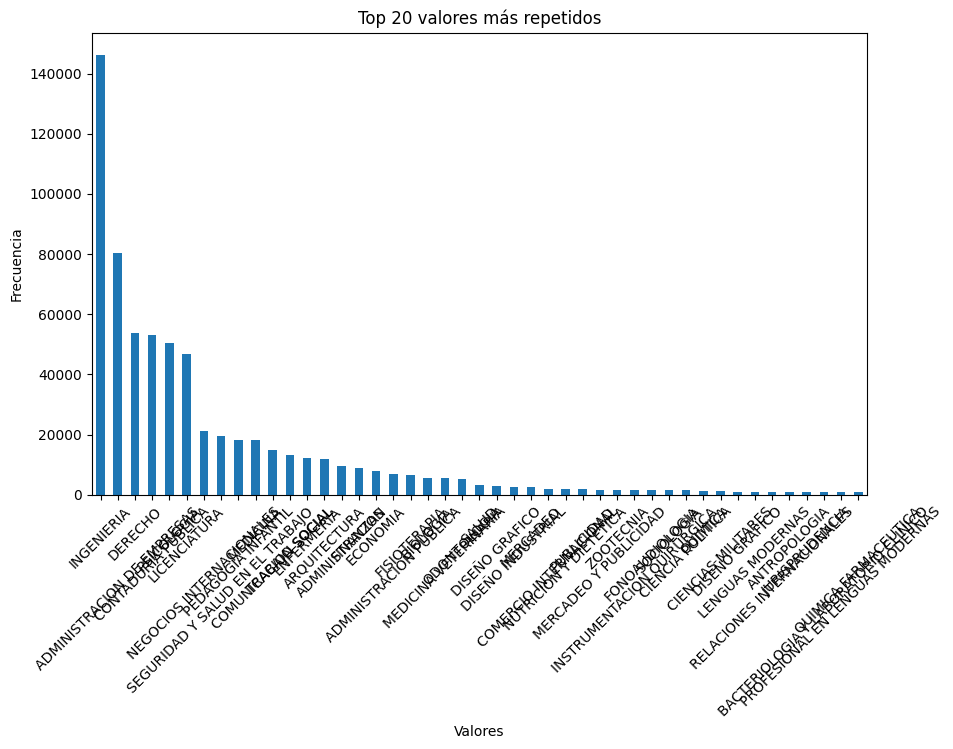

In [33]:
top45 = datos["ESTU_PRGM_ACADEMICO"].value_counts().head(45)

datos['ESTU_PRGM_ACADEMICO'] = datos['ESTU_PRGM_ACADEMICO'].apply(lambda x: x if x in top45 else "OTROS")

print(top45)



import matplotlib.pyplot as plt

# Graficar los resultados
plt.figure(figsize=(10, 6))
top45.plot(kind='bar')
plt.title('Top 20 valores más repetidos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [34]:
carrera = pd.get_dummies(datos['ESTU_PRGM_ACADEMICO'], prefix='ESTU_PRGM_ACADEMICO')

# Convertir los valores booleanos codificados en 0s y 1s
carrera = carrera.astype(int)

#carrera.head(10)

datosOHE = pd.concat([datosOHE, carrera], axis=1)

datosOHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Columns: 132 entries, RENDIMIENTO_GLOBAL to ESTU_PRGM_ACADEMICO_ZOOTECNIA
dtypes: int64(131), object(1)
memory usage: 697.4+ MB


In [35]:
datosOHE.head()

,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,...,ESTU_PRGM_ACADEMICO_PSICOLOGIA,ESTU_PRGM_ACADEMICO_PUBLICIDAD,ESTU_PRGM_ACADEMICO_QUIMICA,ESTU_PRGM_ACADEMICO_QUIMICA FARMACEUTICA,ESTU_PRGM_ACADEMICO_RELACIONES INTERNACIONALES,ESTU_PRGM_ACADEMICO_SALUD,ESTU_PRGM_ACADEMICO_SEGURIDAD Y SALUD EN EL TRABAJO,ESTU_PRGM_ACADEMICO_SOCIOLOGIA,ESTU_PRGM_ACADEMICO_TRABAJO SOCIAL,ESTU_PRGM_ACADEMICO_ZOOTECNIA
0,medio-alto,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bajo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bajo,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,alto,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,medio-bajo,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

Y = datosOHE.iloc[:, :1]
Y.shape
Y.head()

X = datosOHE.iloc[:, 4:]
X.shape
X.head()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.45, random_state=42)



In [37]:
print("Características (X):")
print(X.head())
print("\nVariable objetivo (Y):")
print(Y.head())

print("\nDimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de Y_train:", Y_train.shape)
print("Dimensiones de Y_test:", Y_test.shape)

Características (X):
   FAMI_EDUCACIONMADRE_No Aplica  FAMI_EDUCACIONMADRE_No sabe  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   FAMI_EDUCACIONMADRE_Postgrado  FAMI_EDUCACIONMADRE_Primaria completa  \
0                              1                                      0   
1                              0                                      0   
2                              0                                      0   
3                              0                                      0   
4                              0                                      1   

   FAMI_EDUCACIONMADRE_Primaria incompleta  \
0                                        0   
1                                        0   

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier()

model.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [47]:
testk = pd.read_csv("test.csv")

In [48]:
Y_pred = model.predict(testk)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ESTU_HORASSEMANATRABAJA
- ESTU_PAGOMATRICULAPROPIO
- ESTU_PRGM_ACADEMICO
- ESTU_PRGM_DEPARTAMENTO
- ESTU_PRIVADO_LIBERTAD
- ...
Feature names seen at fit time, yet now missing:
- ESTU_HORASSEMANATRABAJA_0
- ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas
- ESTU_HORASSEMANATRABAJA_Entre 21 y 30 horas
- ESTU_HORASSEMANATRABAJA_Menos de 10 horas
- ESTU_HORASSEMANATRABAJA_Más de 30 horas
- ...


In [40]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.3841315683914962
Classification Report:
               precision    recall  f1-score   support

        alto       0.50      0.54      0.52     79299
        bajo       0.41      0.46      0.43     77842
  medio-alto       0.29      0.26      0.28     77000
  medio-bajo       0.30      0.27      0.28     77484

    accuracy                           0.38    311625
   macro avg       0.38      0.38      0.38    311625
weighted avg       0.38      0.38      0.38    311625



In [41]:
X_test_indices = X_test.index
print(X_test_indices)

Index([137278, 534550, 314034, 418461, 521356, 449642, 140900, 211549,  27927,
       676092,
       ...
       503307, 110376, 658243, 217514, 359771, 260762,  94084, 441376, 402942,
        64699],
      dtype='int64', length=311625)


In [42]:
submission_ids = datos.loc[X_test_indices, 'ID']

In [43]:
submission_df = pd.DataFrame({"ID": submission_ids, "RENDIMIENTO_GLOBAL": Y_pred})

In [45]:
if len(submission_df) > 296786:
    submission_df = submission_df.iloc[:296786]

In [46]:
submission_df.to_csv("submission.csv", index=False)